# Hotel Reservations

### Data Information

<b>The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below.</b>

### Data Dictionary

<ul>
<li><b><i>Booking_ID:</i></b> unique identifier of each booking</li>
<li><b><i>no_of_adults:</i></b> Number of adults</li>
<li><b><i>no_of_children:</i></b> Number of Children</li>
<li><b><i>no_of_weekend_nights:</i></b> Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel</li>
<li><b><i>no_of_week_nights:</i></b> Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel</li>
<li><b><i>type_of_meal_plan:</i></b> Type of meal plan booked by the customer</li>
<li><b><i>required_car_parking_space:</i></b> Does the customer require a car parking space? (0 - No, 1- Yes)</li>
<li><b><i>room_type_reserved:</i></b> Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.</li>
<li><b><i>lead_time:</i></b> Number of days between the date of booking and the arrival date</li>
<li><b><i>arrival_year:</i></b> Year of arrival date</li>
<li><b><i>arrival_month:</i></b> Month of arrival date</li>
<li><b><i>arrival_date:</i></b> Date of the month</li>
<li><b><i>market_segment_type:</i></b> Market segment designation.</li>
<li><b><i>repeated_guest:</i></b> Is the customer a repeated guest? (0 - No, 1- Yes)</li>
<li><b><i>no_of_previous_cancellations:</i></b> Number of previous bookings that were canceled by the customer prior to the current booking</li>
<li><b><i>no_of_previous_bookings_not_canceled:</i></b> Number of previous bookings not canceled by the customer prior to the current booking</li>
<li><b><i>avg_price_per_room:</i></b> Average price per day of the reservation; prices of the rooms are dynamic. (in euros)</li>
<li><b><i>no_of_special_requests:</i></b> Total number of special requests made by the customer (e.g. high floor, view from the room, etc)</li>
<li><b><i>booking_status:</i></b> Flag indicating if the booking was canceled or not.</li>
</ul>

## Library Imports

In [238]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

## Getting Data Ready

In [201]:
data = pd.read_csv("Hotel Reservations.csv")
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [202]:
data.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [203]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [205]:
cat_columns = data.select_dtypes(object).columns
num_columns = data.select_dtypes(exclude='object').columns

In [206]:
assert len(num_columns) + len(cat_columns) == len(data.columns)

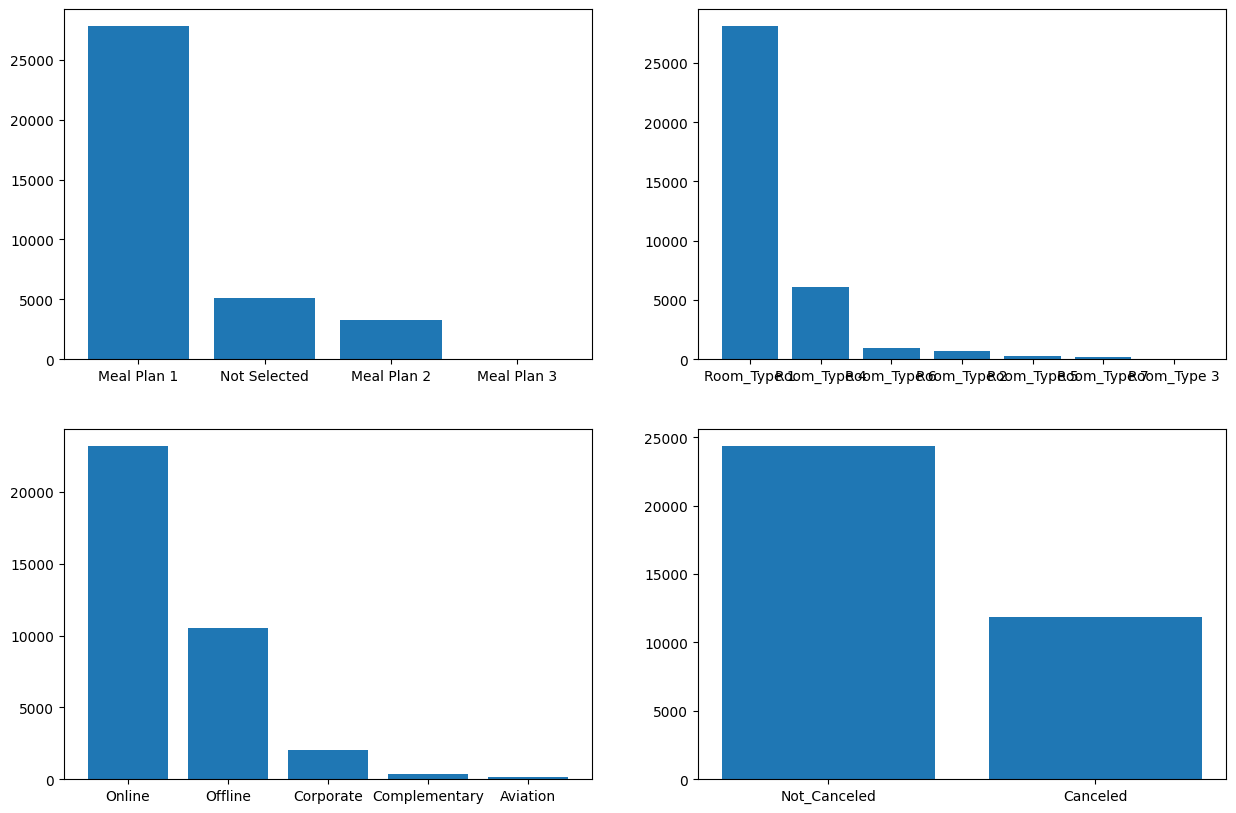

In [207]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0,0].bar(data[cat_columns[1]].value_counts().keys(), data[cat_columns[1]].value_counts().values)
ax[0,1].bar(data[cat_columns[2]].value_counts().keys(), data[cat_columns[2]].value_counts().values)
ax[1,0].bar(data[cat_columns[3]].value_counts().keys(), data[cat_columns[3]].value_counts().values)
ax[1,1].bar(data[cat_columns[4]].value_counts().keys(), data[cat_columns[4]].value_counts().values)
plt.show()

In [208]:
## Train Test Split
X = data.drop('booking_status', axis=1)
y = data['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Data Preprocessing

In [209]:
cat_encoder = OneHotEncoder(drop='first')
cat_encoder.fit(X_train[cat_columns[1:-1]])
X_train_cat = cat_encoder.transform(X_train[cat_columns[1:-1]])
X_test_cat  = cat_encoder.transform(X_test[cat_columns[1:-1]])

In [210]:
X_train_cat = pd.DataFrame(X_train_cat.toarray(), columns=cat_encoder.get_feature_names_out())
X_test_cat  = pd.DataFrame(X_test_cat.toarray(), columns=cat_encoder.get_feature_names_out())
X_train_num = X_train.select_dtypes(exclude='object')
X_test_num  = X_test.select_dtypes(exclude='object')
X_train_num.index = np.arange(0, len(X_train_num))
X_test_num.index  = np.arange(0, len(X_test_num))
X_train = pd.concat([X_train_cat, X_train_num], axis=1)
X_test  = pd.concat([X_test_cat, X_test_num], axis=1)
y_train_bool = np.array([d for d in y_train == 'Canceled'])
y_test_bool  = np.array([d for d in y_test  == 'Canceled'])
y_train_bool = y_train_bool.astype(int)
y_test_bool  = y_test_bool.astype(int)

## Model 

In [234]:
rf_cls = RandomForestClassifier()
rf_cls.fit(X_train, y_train_bool)

RandomForestClassifier()

In [235]:
preds = rf_cls.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [237]:
rf_cls.score(X_test, y_test_bool)

0.9026878015161958

## Save Results

In [240]:
joblib.dump(cat_encoder, "./encoder.joblib", compress=True)
joblib.dump(rf_cls, "./rf.joblib", compress=True)

['./rf.joblib']